In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import yaml

In [2]:
# Set the repository root as a working directory 

%cd ..

/home/alex/Dev/Projects/mlrepa/alex_kolosov/dvc-5-demo-project-iris


# View `params.yaml` config

In [3]:
# Look on pipelines config 

with open('params.yaml') as conf_file:
    config = conf_file.read()
    
print(config)

base:
  project: dvc-5-demo-project-iris

  model:
    model_name: model.joblib
    models_folder: models

  reports:
    reports_folder: reports

  random_state: 42 # random state for train/test split


data_load:
  dataset_csv: data/raw/iris.csv


featurize:
  features_path: data/processed/featured_iris.csv
  target_column: target


data_split:
  folder: experiments
  train_path: data/processed/train_iris.csv
  test_path: data/processed/test_iris.csv
  test_size: 0.3


train:
  cv: 3
  estimator_name: svm
  estimators:

    logreg: # sklearn.linear_model.LogisticRegression
      param_grid: # params of GridSearchCV constructor
        C: [0.001, 0.01]
        max_iter: [100]
        solver: ['lbfgs']
        multi_class: ['multinomial']

    svm: # sklearn.svm.SVC
      param_grid:
        C: [0.1, 1.0]
        kernel: ["rbf", "linear"]
        gamma: ["scale"]
        degree: [3, 5]

evaluate:
  metrics_file: metrics.json
  confusion_matrix_png: confusion_matrix.png
  classes_path: 

# Load data

- src/pipelines/data_load.py

## Run as Python function 

In [4]:
from src.pipelines.data_load import data_load

data_load('params.yaml')

## Run as Python module

In [5]:
!python src/pipelines/data_load.py --config=params.yaml

In [6]:
%%bash 

# Raw Iris dataset saved

ls data/raw

iris.csv


# Extract features

- `src/pipelines/featurize.py`

In [7]:
!python src/pipelines/featurize.py --config=params.yaml

In [8]:
# Features.csv file has created

!ls data/processed

featured_iris.csv


# Split train/test dataset

- `src/pipelines/data_split.py`

In [9]:
!python src/pipelines/data_split.py --config=params.yaml

In [10]:
# Train and Test datsets have created

!ls data/processed/

featured_iris.csv  test_iris.csv  train_iris.csv


# Train model

- `src/pipelines/train.py`

In [11]:
!python src/pipelines/train.py --config=params.yaml

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished
0.9517707329252986


In [12]:
# model is created
!ls models/

model.joblib


# Evaluate model 

- add `reports/` folder 
- add `src/pipelines/evaluate.py`

In [13]:
!python src/pipelines/evaluate.py --config=params.yaml

F1 metrics file saved to : reports/metrics.json
Confusion matrix saved to : reports/confusion_matrix.png
Classes actual/predicted saved to : reports/classess.csv


In [14]:
# metrics file eval.txt is created
!ls reports

classess.csv  confusion_matrix.png  metrics.json


In [15]:
!cat reports/metrics.json

{"f1_score": 1.0}

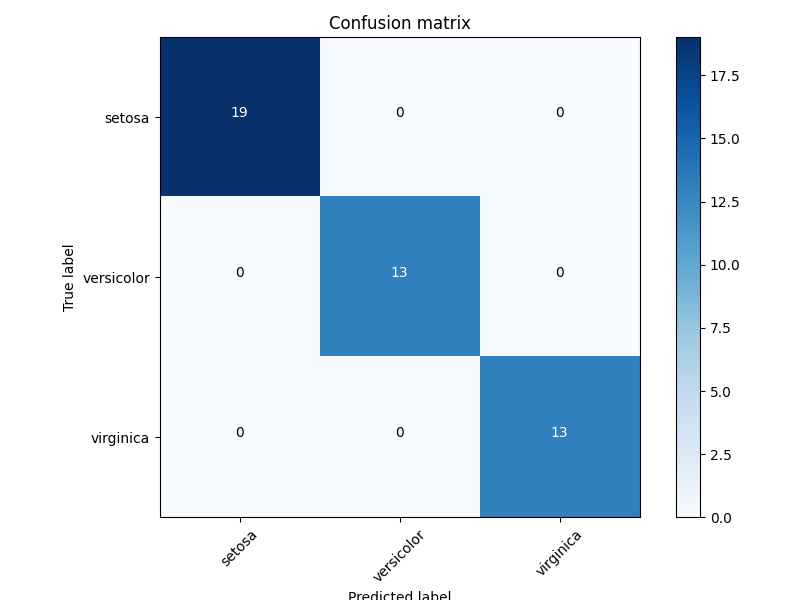

In [17]:
# Display confusion matrix

from IPython.display import Image
Image('reports/confusion_matrix.png')